# Load data & preprocess

In [30]:
#genes.bc <- read.table(file = "../../data/mouse-skin/atac_genes_bc.bed", as.is = c(4,7), sep = "\t", header = FALSE)
promoters.bc <- read.table(file = "../../data/mouse-skin/atac_promoters-3000_bc.bed", as.is = c(4,7), sep = "\t", header = FALSE)

In [28]:
str(genes.bc)

'data.frame':	27908 obs. of  7 variables:
 $ V1: Factor w/ 21 levels "chr1","chr10",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ V2: int  3205900 3466586 3905738 3999556 4292980 4490930 4583128 4773205 4807787 4807891 ...
 $ V3: int  3671498 3513553 3986215 4409241 4409187 4497354 4586252 4785739 4848410 4886770 ...
 $ V4: chr  "Xkr4" "Gm1992" "Gm37381" "Rp1" ...
 $ V5: Factor w/ 1 level ".": 1 1 1 1 1 1 1 1 1 1 ...
 $ V6: Factor w/ 2 levels "-","+": 1 2 1 1 1 1 1 1 2 2 ...
 $ V7: chr  "R1.27,R2.81,R3.31,P1.07;R1.70,R2.68,R3.36,P1.05;R1.52,R2.11,R3.53,P1.07;R1.38,R2.08,R3.76,P1.05;R1.78,R2.66,R3."| __truncated__ "R1.15,R2.92,R3.79,P1.06;R1.37,R2.70,R3.31,P1.05;R1.72,R2.64,R3.55,P1.05;R1.58,R2.52,R3.17,P1.05;R1.50,R2.27,R3."| __truncated__ "R1.44,R2.01,R3.06,P1.07;R1.60,R2.62,R3.57,P1.05;R1.36,R2.33,R3.46,P1.05;R1.20,R2.32,R3.39,P1.08;R1.40,R2.68,R3."| __truncated__ "R1.48,R2.27,R3.43,P1.08;R1.75,R2.62,R3.56,P1.07;R1.53,R2.65,R3.32,P1.05;R1.82,R2.12,R3.58,P1.07;R1.11,R2.12,R3."| __truncated__ ...


In [31]:
str(promoters.bc)

'data.frame':	27908 obs. of  7 variables:
 $ V1: Factor w/ 21 levels "chr1","chr10",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ V2: int  3463586 3671498 3986215 4409187 4409241 4497354 4586252 4785739 4804787 4804891 ...
 $ V3: int  3466586 3674498 3989215 4412187 4412241 4500354 4589252 4788739 4807787 4807891 ...
 $ V4: chr  "Gm1992" "Xkr4" "Gm37381" "Rp1" ...
 $ V5: Factor w/ 1 level ".": 1 1 1 1 1 1 1 1 1 1 ...
 $ V6: Factor w/ 2 levels "-","+": 2 1 1 1 1 1 1 1 2 2 ...
 $ V7: chr  "R1.44,R2.34,R3.22,P1.08;R1.59,R2.36,R3.30,P1.07;R1.81,R2.88,R3.14,P1.08;R1.77,R2.37,R3.29,P1.05;R1.91,R2.23,R3."| __truncated__ "R1.50,R2.34,R3.30,P1.05;R1.69,R2.44,R3.01,P1.05;R1.93,R2.50,R3.77,P1.07;R1.67,R2.94,R3.62,P1.05;R1.93,R2.19,R3."| __truncated__ "R1.72,R2.27,R3.63,P1.08;R1.28,R2.58,R3.29,P1.06;R1.58,R2.83,R3.69,P1.05;R1.66,R2.42,R3.17,P1.06;R1.13,R2.91,R3."| __truncated__ "R1.42,R2.02,R3.10,P1.08;R1.09,R2.09,R3.27,P1.07;R1.30,R2.03,R3.50,P1.05;R1.75,R2.44,R3.76,P1.06;R1.78,R2.07,R3."| __truncated__ ...


In [32]:
genes = genes.bc$V4
length(unique(genes))

[1] 27853

In [33]:
bc <- genes.bc[,7]
bc_split <- strsplit(bc,";")
bc_split_vec <- unlist(bc_split)
bc_unique <- unique(bc_split_vec)
bc_counts <- table(bc_split_vec)

In [34]:
length(bc_unique)

[1] 74737

In [35]:
bc.counts.df = data.frame(bc_counts)
bc.counts.df$label = "read_count"

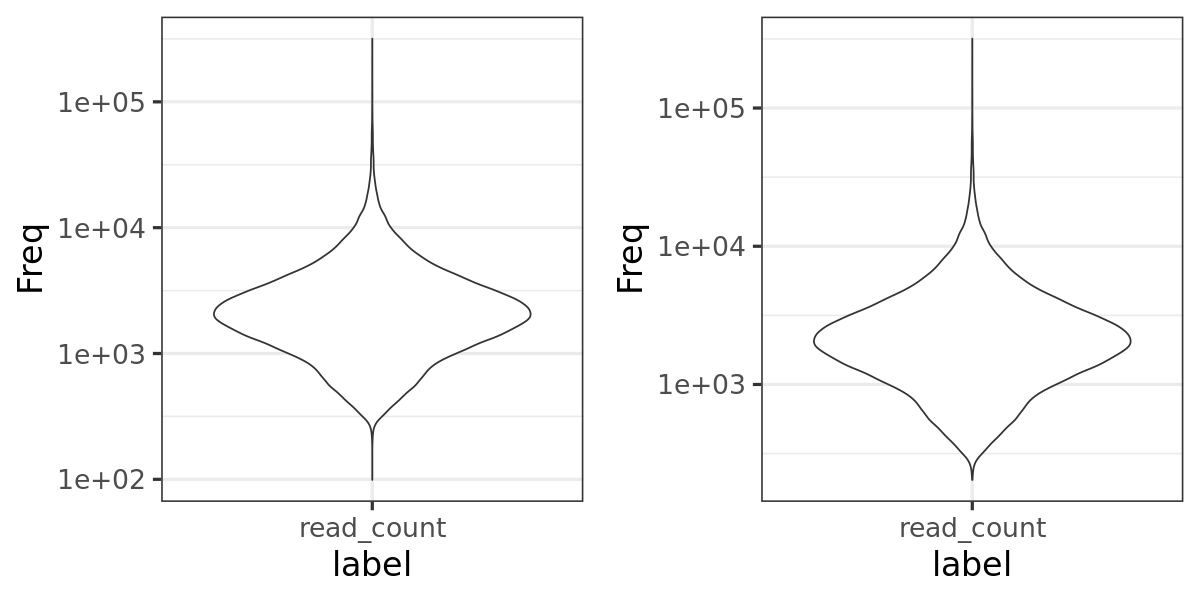

In [36]:
options(repr.plot.width = 10, repr.plot.height = 5)
library(ggplot2)
p1 <- ggplot(bc.counts.df, aes(x = label, y = Freq)) + geom_violin() + scale_y_log10() + theme_bw(base_size = 20)
p2 <- ggplot(subset(bc.counts.df, Freq > 200), aes(x = label, y = Freq)) + geom_violin() + scale_y_log10()+ theme_bw(base_size = 20)
cowplot::plot_grid(p1, p2, ncol = 2)

In [37]:
bc_filt <- names(bc_counts)[bc_counts > 200]
barcodes <- bc_filt

In [38]:
length(barcodes)

[1] 74734

In [39]:
library(liger)
gene.counts <- makeFeatureMatrix(genes.bc, barcodes)
promoter.counts <- makeFeatureMatrix(promoters.bc, barcodes)

In [40]:
str(gene.counts)

 num [1:27908, 1:74734] 0 0 0 0 0 0 0 0 0 0 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:27908] "Xkr4" "Gm1992" "Gm37381" "Rp1" ...
  ..$ : chr [1:74734] "R1.01,R2.01,R3.06,P1.07" "R1.01,R2.01,R3.36,P1.05" "R1.01,R2.01,R3.38,P1.08" "R1.01,R2.01,R3.42,P1.07" ...


In [41]:
str(promoter.counts)

 num [1:27908, 1:74734] 0 0 0 0 0 0 0 0 0 0 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:27908] "Gm1992" "Xkr4" "Gm37381" "Rp1" ...
  ..$ : chr [1:74734] "R1.01,R2.01,R3.06,P1.07" "R1.01,R2.01,R3.36,P1.05" "R1.01,R2.01,R3.38,P1.08" "R1.01,R2.01,R3.42,P1.07" ...


In [42]:
gene.counts <- gene.counts[order(rownames(gene.counts)),]
promoter.counts <- promoter.counts[order(rownames(promoter.counts)),]
activity <- gene.counts + promoter.counts
#colnames(activity)=paste0("D5T1_",colnames(activity))

In [43]:
data <- readRDS('../../data/mouse-skin/data_list.rds')
rna <- data[['Gene Expression']]

In [47]:
str(rna)

Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  ..@ i       : int [1:22350084] 96 192 572 824 1207 1635 1646 1810 1846 1881 ...
  ..@ p       : int [1:34775] 0 330 782 1598 2396 2875 4076 4385 5102 6807 ...
  ..@ Dim     : int [1:2] 23296 34774
  ..@ Dimnames:List of 2
  .. ..$ : chr [1:23296] "0610007P14Rik" "0610009B22Rik" "0610009L18Rik" "0610009O20Rik" ...
  .. ..$ : chr [1:34774] "R1.01.R2.01.R3.06.P1.55" "R1.01.R2.03.R3.68.P1.55" "R1.01.R2.05.R3.15.P1.53" "R1.01.R2.05.R3.40.P1.55" ...
  ..@ x       : num [1:22350084] 1 1 1 1 1 1 1 1 1 1 ...
  ..@ factors : list()


In [48]:
str(barcodes)

 chr [1:74734] "R1.01,R2.01,R3.06,P1.07" "R1.01,R2.01,R3.36,P1.05" ...


In [12]:
meta <- read.table("../../data/mouse-skin/GSM4156597_skin_celltype.txt", head = T, stringsAsFactors = F)

In [63]:
colnames(activity) <- gsub(",", ".", colnames(activity))

In [83]:
colnames(activity) <- meta$rna.bc[match(colnames(activity), meta$atac.bc)]

In [84]:
# We'll only use the matched set of cells for our benchmark
shared_cells = intersect(colnames(rna), colnames(activity))
activity_shared = activity[, colnames(activity) %in% shared_cells]
rna_shared = rna[,colnames(rna) %in% shared_cells]

In [85]:
colnames(rna_shared) <- paste0("rna.", colnames(rna_shared))
colnames(activity_shared) <- paste0("atac.", colnames(activity_shared))

In [87]:
library(rliger)
liger.data <- list(atac = activity_shared, rna = rna_shared)
integrated <- createLiger(liger.data)
#rm(genes.bc, promoters.bc, gene.counts, promoter.counts, activity_shared, rna, liger.data)
gc()


Attaching package: ‘rliger’


The following objects are masked from ‘package:liger’:

    calcAgreement, calcAlignment, calcAlignmentPerCluster, calcARI,
    calcDatasetSpecificity, calcPurity, convertOldLiger, createLiger,
    getFactorMarkers, getGeneValues, getProportionMito, imputeKNN,
    ligerToSeurat, linkGenesAndPeaks, louvainCluster,
    makeFeatureMatrix, makeInteractTrack, makeRiverplot, mergeH5,
    normalize, online_iNMF, optimizeALS, optimizeNewData, optimizeNewK,
    optimizeNewLambda, optimizeSubset, plotByDatasetAndCluster,
    plotClusterFactors, plotClusterProportions, plotFactors,
    plotFeature, plotGene, plotGeneLoadings, plotGenes, plotGeneViolin,
    plotWordClouds, quantile_norm, quantileAlignSNF, read10X,
    readSubset, removeMissingObs, reorganizeLiger, restoreOnlineLiger,
    runGSEA, runTSNE, runUMAP, runWilcoxon, scaleNotCenter,
    selectGenes, seuratToLiger, subsetLiger, suggestK, suggestLambda


Removing 980 genes not expressing in atac.

Removing 22

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,3018034,161.2,6039078,322.6,3778945,201.9
Vcells,9113313643,69529.1,13108136220,100007.2,10673593513,81433.1


In [88]:
saveRDS(liger.data, "liger.data.rds")

In [89]:
integrated <- normalize(integrated)
integrated <- selectGenes(integrated, datasets.use = 2)
integrated <- scaleNotCenter(integrated)

# 2. iNMF

* k: number of factors to be used. 
* lambda: regularization parameter. Larger value will force alignment. (default=5)
* thresh: Convergence threshold (default=1e-6)
* max.iters: (default=30)

In [145]:
integrated <- optimizeALS(integrated, k = 20, lambda = 5, max.iters = 100)
saveRDS(integrated, "integrated_k20_lam5.rds")

  |======================================================================| 100%
Finished in 28.98714 mins, 100 iterations.
Max iterations set: 100.
Final objective delta: 2.269861e-06.
Best results with seed 1.


In [4]:
library(liger)

Loading required package: cowplot

Loading required package: Matrix

Loading required package: patchwork


Attaching package: ‘patchwork’


The following object is masked from ‘package:cowplot’:

    align_plots




# 3. Quantile normalize & joint clustering

Obtain joint clusters and do quantile normalization to align ATAC to RNA
* dims.use (default = all)
* ref_dataset (default = largest number of cells): name of dataset to be used as a reference

In [7]:
str(integrated)

Formal class 'liger' [package "liger"] with 20 slots
  ..@ raw.data          :List of 2
  .. ..$ atac:Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. ..@ i       : int [1:115251287] 13 17 21 33 62 86 121 134 166 225 ...
  .. .. .. ..@ p       : int [1:34775] 0 1541 13373 16134 18837 21928 27559 31546 36961 41431 ...
  .. .. .. ..@ Dim     : int [1:2] 26928 34774
  .. .. .. ..@ Dimnames:List of 2
  .. .. .. .. ..$ : chr [1:26928] "0610007P14Rik" "0610009B22Rik" "0610009L18Rik" "0610009O20Rik" ...
  .. .. .. .. ..$ : chr [1:34774] "atac.R1.01.R2.01.R3.06.P1.55" "atac.R1.01.R2.01.R3.36.P1.53" "atac.R1.01.R2.01.R3.43.P1.56" "atac.R1.01.R2.02.R3.21.P1.56" ...
  .. .. .. ..@ x       : num [1:115251287] 2 2 1 1 2 1 2 1 1 1 ...
  .. .. .. ..@ factors : list()
  .. ..$ rna :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. ..@ i       : int [1:22350084] 95 188 561 807 1185 1611 1622 1784 1820 1855 ...
  .. .. .. ..@ p       : int [1:34775] 0 330 782 1598 23

In [8]:
integrated <- quantile_norm(integrated, ref_dataset = "rna")

# 4. Visualization

In [9]:
integrated <- runUMAP(integrated, distance = 'cosine', n_neighbors = 30, min_dist = 0.3)

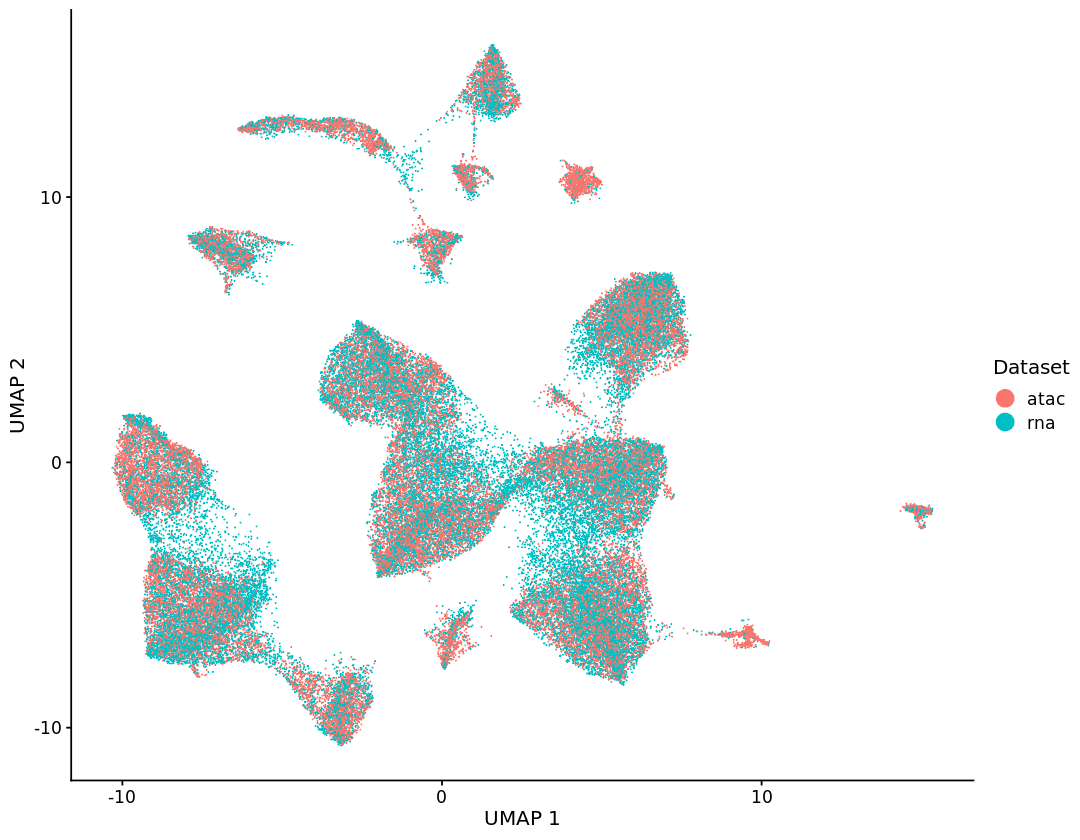

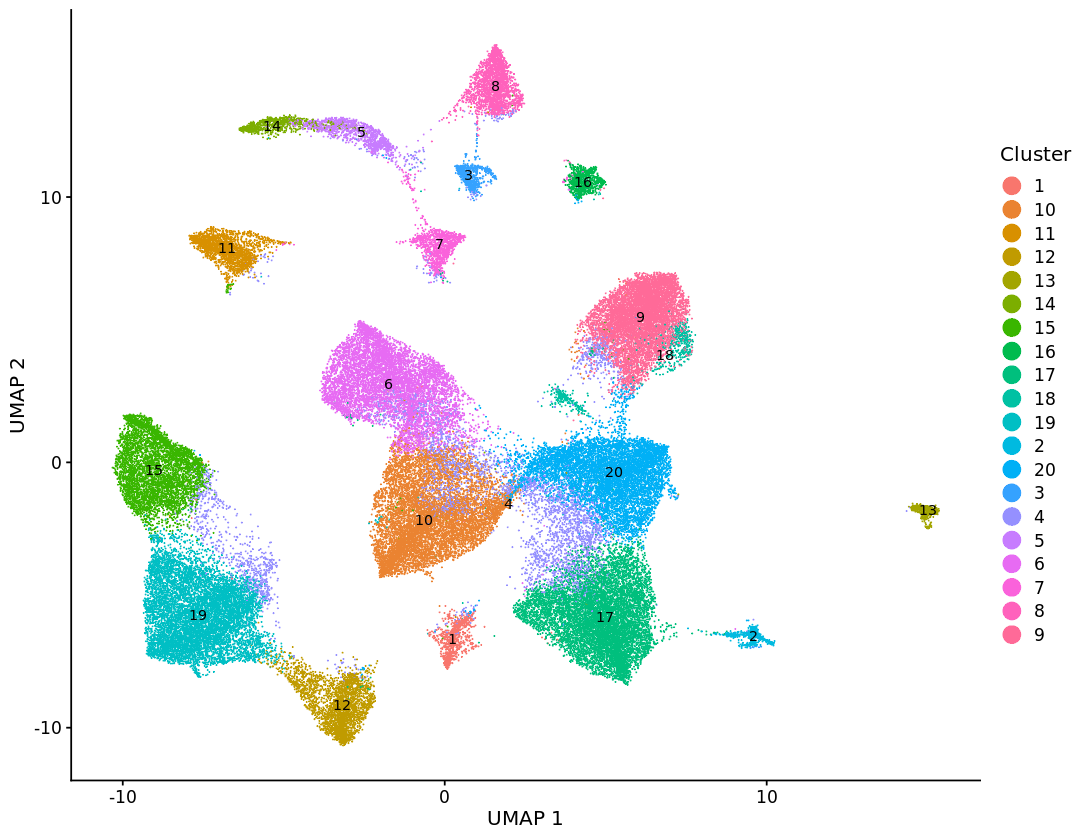

In [11]:
# k = 20, lambda = 5
# quantile norm ref is rna
options(repr.plot.width = 9, repr.plot.height = 7)
plotByDatasetAndCluster(integrated, axis.labels = c('UMAP 1', 'UMAP 2'))

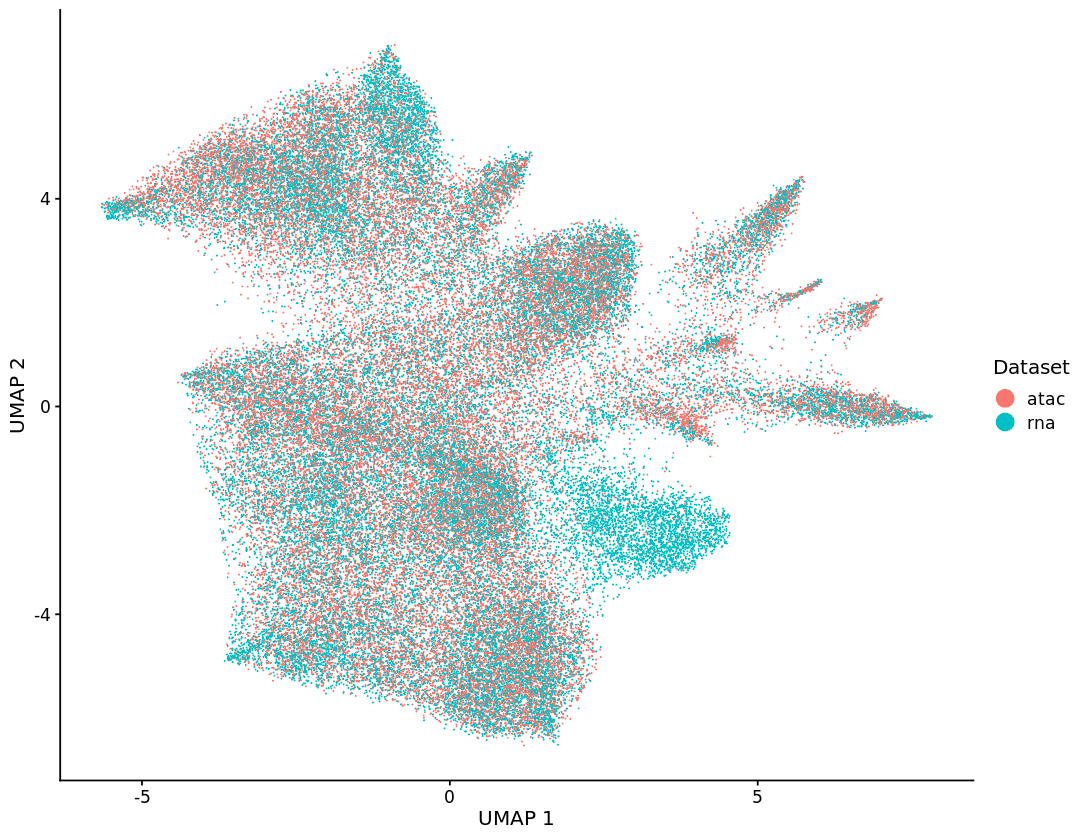

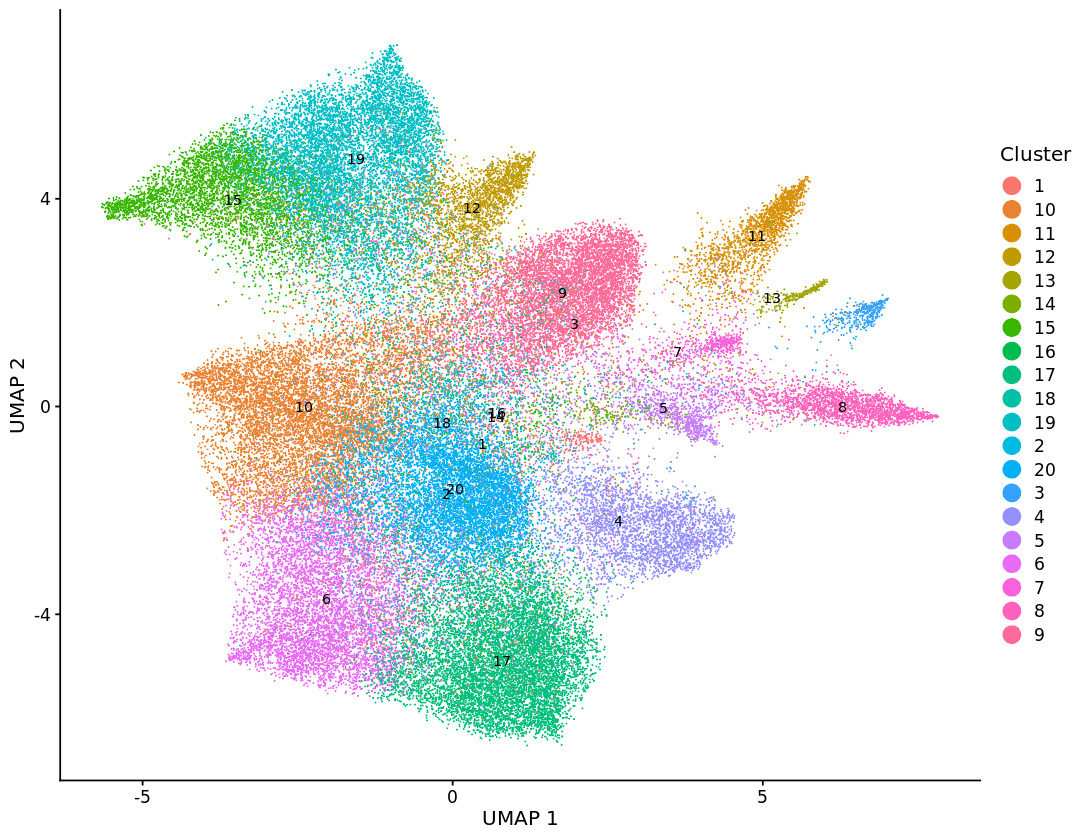

In [148]:
# k = 20, lambda = 5
# Quantile norm Ref is atac
options(repr.plot.width = 9, repr.plot.height = 7)
plotByDatasetAndCluster(integrated, axis.labels = c('UMAP 1', 'UMAP 2'))

In [13]:
celltype.df <- data.frame(bc = c(paste0("atac.", meta$rna.bc), paste0("rna.", meta$rna.bc)), celltype = c(meta$celltype, meta$celltype))

In [14]:
integrated@cell.data$celltype = celltype.df$celltype[match(rownames(integrated@tsne.coords), celltype.df$bc)]

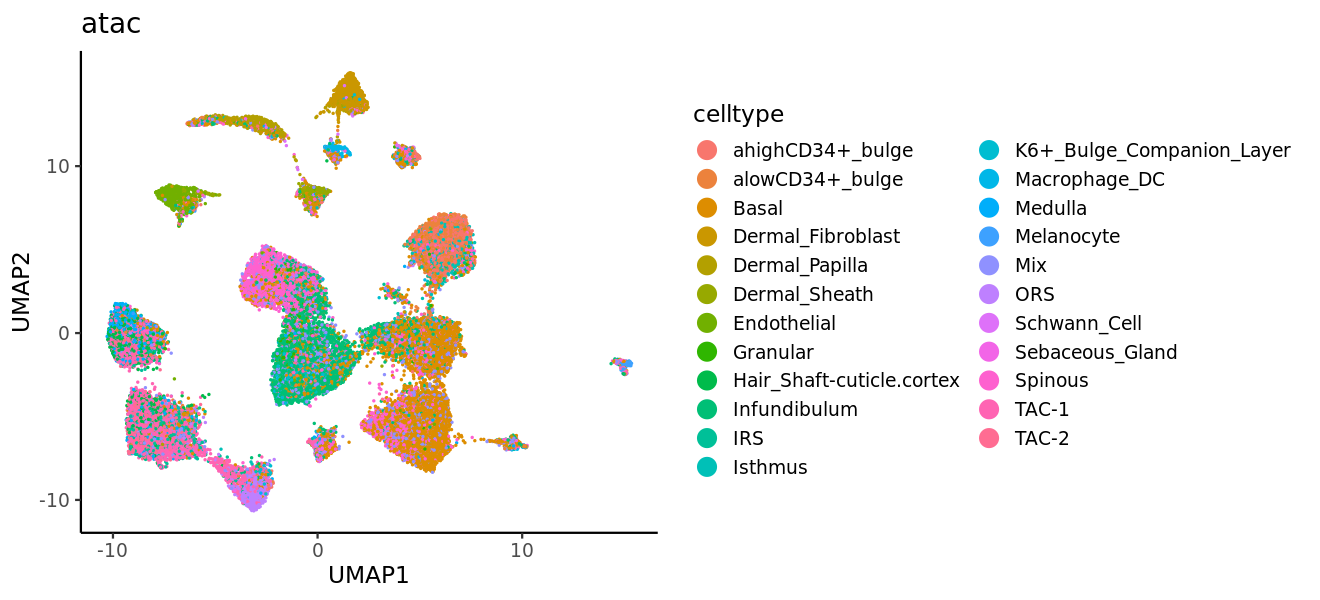

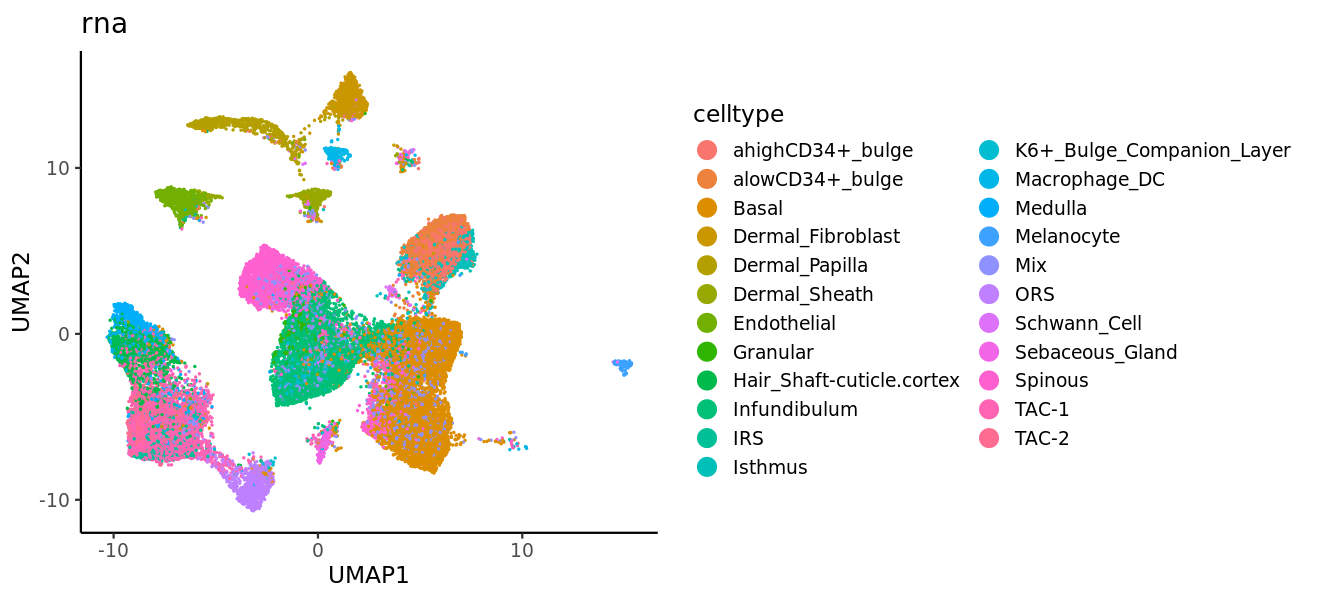

In [18]:
# k = 20, labmda = 5
require(ggplot2)
options(repr.plot.width = 11, repr.plot.height = 5)
plist = plotFeature(integrated, "celltype", return.plots = T)
plist[[1]] + theme_classic(base_size = 14) + xlab("UMAP1") + ylab("UMAP2")
plist[[2]] + theme_classic(base_size = 14) + xlab("UMAP1") + ylab("UMAP2")

In [19]:
integrated_embedding = data.frame(integrated@H.norm)
colnames(integrated_embedding) = paste0("Factor_", 1:ncol(integrated_embedding))
integrated_embedding$cell_type = celltype.df$celltype[match(rownames(integrated_embedding), celltype.df$bc)]


In [20]:
integrated_embedding$batch = as.numeric(factor(sapply(strsplit(rownames(integrated_embedding), split = ".", fixed = T), function(s) paste0(s[2:length(s)], collapse = "."))))
str(integrated_embedding$batch)

 num [1:69548] 1 2 3 4 5 6 7 8 9 10 ...


In [21]:
write.table(integrated_embedding, "integrated_embedding_lambda5.txt", quote = F, sep = "\t", row.names= T, col.names = T)